<div style='width:500px; height:160px; border-bottom:10px black solid;border-left: 10px green solid;padding: 10px 10px 10px 10px;'>
    <h1> ---Portofolio Optimization Plot---</h1>
    <h3> Author: Jakob Lindstrøm </h3>
    <h3> Date: 03.05.2023 </h3>
</div>

<div style='width:600px; height:500px; padding: 10px 10px 10px 10px;border-bottom:10px black solid;
            border-left: 10px green solid'>
    <div>
        <h4>Keywords:</h4>
        <p> Stocks, portfolio, optimization, finance </p>
        <h4> Data sources:  </h4>
        <p> yfinance: https://pypi.org/project/yfinance/ </p>
        <p> DNB markets: https://www.dnb.no/bedrift/markets/analyser/arkiv/anbefalteaksjer.html </p>
        <h4> Intention: </h4>
        <p> This programe has the goal of finding the optimal weigths for a given amount of stocks in a portofolio. The programe uses live-data from the python library yfinance, and decides the best weigths based on a number of parameters. You can choose the stocks for yourself. However, I use the weekly recommened stocks from DNB markets. </p>
        <br>
        <h4> Disclaimer: </h4>
        <p> The author do not take any responsibility for potential consequences thats been a result of using the code below. </p>
    </div>
</div>

<h3> Table of content </h3>
<ol>
    <li>Portofolio summary plot</li>
    <li>Normal start of code</li>
    <ol>
        <li>Importations of libraries and data retrieving</li>
        <li>Ratios and risks</li>
        <li> First time sorting</li>
        <li>Second time sorting</li>
        <li>Third time sorting</li>
        <li>Conclusion</li>
        <li> Random walk plot </li>
    </ol>    
</ol>

<h1> 1 Portofolio summary plot

<h3>Read first: </h3>
<p> This first section of code should be runned last, since its a summary of all the steps and decisions for the whole code. </p>

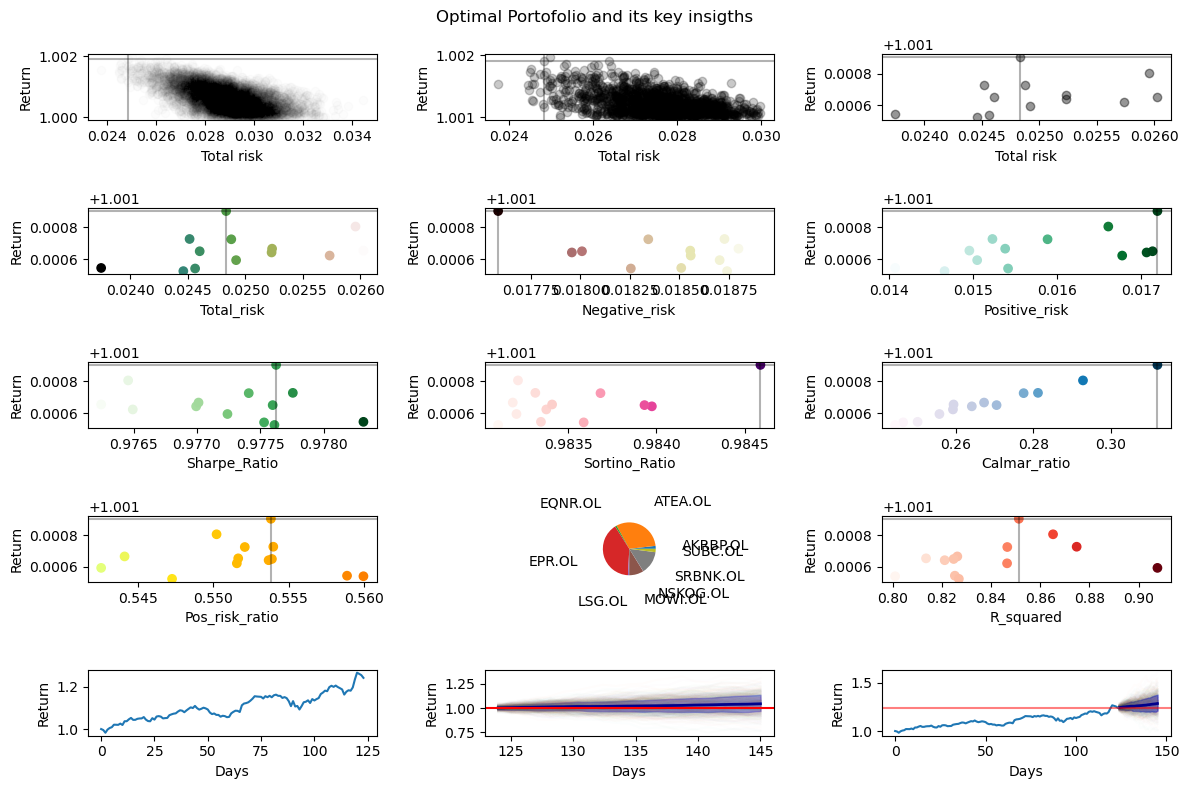

In [76]:
fig, ax = plt.subplots(5,3, figsize=(12,8))

datasets = [dfFirst, dfSecond, dfThird, optimal_portofolio]
risktypes = ['Total_risk','Negative_risk','Positive_risk']
colormaps = ['Greens','RdPu','PuBu']
neg_colormaps = ['gist_earth','pink','BuGn']
ratiotypes = ['Sharpe_Ratio','Sortino_Ratio','Calmar_ratio']
othertypes = ['Pos_risk_ratio','','R_squared']
second_colormaps = ['Wistia','','Reds']

for i in range(0,3,1):
    for j in range(0,3,1):
        if i == 0:
            ax[i,j].scatter(x='Total_risk', y='Return',data=datasets[j], color='black', alpha=.01+(.2*j))
            ax[i,j].set_xlabel('Total risk')
            ax[i,j].set_ylabel('Return')
        if i == 1: 
            ax[i,j].scatter(x=risktypes[j], y='Return', data=datasets[2], c=risktypes[j], cmap=neg_colormaps[j])
            ax[i,j].set_xlabel(risktypes[j])
            ax[i,j].set_ylabel('Return')
        elif i == 2: 
            ax[i,j].scatter(x=ratiotypes[j], y='Return', data=datasets[2], c=ratiotypes[j], cmap=colormaps[j])
            ax[i,j].set_xlabel(ratiotypes[j])
            ax[i,j].set_ylabel('Return')
        else:
            a =[]

for i in range(0,3,2):
    ax[3,i].scatter(x=othertypes[i], y='Return', data=datasets[2], c=othertypes[i], cmap=second_colormaps[i])
    ax[3,i].axhline(y=datasets[3]['Return'][0],color='black',alpha=.3)
    ax[3,i].axvline(x=datasets[3][othertypes[i]][0],color='black',alpha=.3)
    ax[3,i].set_xlabel(othertypes[i])
    ax[3,i].set_ylabel('Return')
ax[3,1].pie(optimal_portofolio['Weigths'][0][0],labels=stocks,labeldistance=2)

for i in range(0,3,1):
    for j in range(0,3,1):
        ax[i,j].axhline(y=datasets[3]['Return'][0],color='black',alpha=.3)
        if i == 1:
            ax[i,j].axvline(x=datasets[3][risktypes[j]][0],color='black',alpha=.3)
        elif i ==  2:
            ax[i,j].axvline(x=datasets[3][ratiotypes[j]][0],color='black',alpha=.3)
        else:
            ax[i,j].axvline(x=datasets[3][risktypes[0]][0], color='black', alpha=.3)

ax[4,0].plot(pd.Series(portofolio_movement))

for i in range(0,3,1):
    ax[4,i].set_xlabel('Days')
    ax[4,i].set_ylabel('Return')
for i in range(0,len(random_walk_df.columns)-3,1):
    ax[4,1].plot(np.linspace(len(mystocks[0][1]),len(mystocks[0][1])+hold_portofolio_days,hold_portofolio_days),
    random_walk_df[str(i)], alpha=.01)
ax[4,1].plot(np.linspace(len(mystocks[0][1]),len(mystocks[0][1])+hold_portofolio_days,hold_portofolio_days),
        random_walk_df['Average'], linewidth=2, color='darkblue')
ax[4,1].fill_between(np.linspace(len(mystocks[0][1]),len(mystocks[0][1])+hold_portofolio_days,hold_portofolio_days),
                random_walk_df['Lower'],
                random_walk_df['Upper'],
                color='blue', alpha=.3)
ax[4,1].axhline(y=1,color='red')    

for i in range(0,len(random_walk_df.columns)-3,1):
    ax[4,2].plot(np.linspace(len(mystocks[0][1]),len(mystocks[0][1])+hold_portofolio_days,hold_portofolio_days),
    random_walk_df[str(i)]+portofolio_movement[-1:][0]-1, alpha=.01)
ax[4,2].plot(np.linspace(len(mystocks[0][1]),len(mystocks[0][1])+hold_portofolio_days,hold_portofolio_days),
        random_walk_df['Average']+portofolio_movement[-1:][0]-1, linewidth=2, color='darkblue')

ax[4,2].fill_between(np.linspace(len(mystocks[0][1]),len(mystocks[0][1])+hold_portofolio_days,hold_portofolio_days),
                random_walk_df['Lower']+portofolio_movement[-1:][0]-1,
                random_walk_df['Upper']+portofolio_movement[-1:][0]-1,
                color='blue', alpha=.5)
ax[4,2].plot(pd.Series(portofolio_movement))
plt.axhline(y=portofolio_movement[-1:][0], color='r', alpha=.5)

fig.suptitle('Optimal Portofolio and its key insigths')
fig.tight_layout()
plt.show()


<h1>2 Normal start of program: </h1>

<h3> A) Importation of libraries and retrieving data</h3>

In [1]:
#Importing libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf   
from datetime import datetime

import scipy.stats as st
import statsmodels.formula.api as smf
import random as rd
import math 
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [30]:
#INPUT FIELD:   
stocks = ['AKRBP.OL','ATEA.OL','EQNR.OL','EPR.OL','LSG.OL','MOWI.OL','NSKOG.OL','SRBNK.OL','SUBC.OL']
startPor = '2022-11-05'
hold_portofolio_days = 21
portofolio_Distributions = 10000
endDate = datetime.now().strftime('%Y-%m-%d')
#year-month-day
# endDate = '2023-01-29'

In [31]:
#Retrieve financial data from yahoo finace


def dataRetriever():
    df = []
    for i in range(0,len(stocks),1):
        yahoo = yf.download(stocks[i], start=startPor, end=endDate)
        data = [0]
        for j in range(0, len(yahoo['Adj Close'])-1,1):
            selecive_data = ((yahoo['Adj Close'][j+1]/yahoo['Adj Close'][j])-1)
            data.append(selecive_data)
        adj_close = yahoo['Adj Close']
        relevant  = [stocks[i], data, adj_close]
        df.append(relevant)
    return df
mystocks = dataRetriever()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


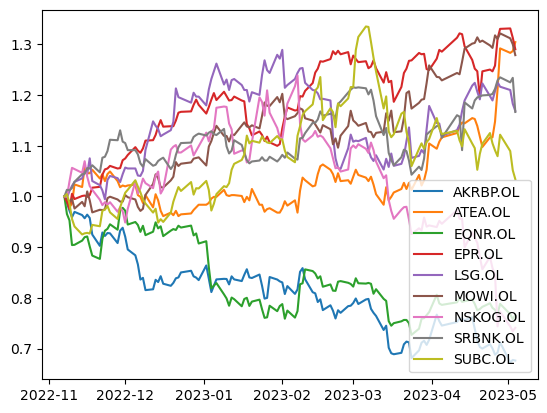

In [32]:
#Plot the past movement for the different stocks


fig, ax = plt.subplots()
for i in range(0,len(mystocks),1):
    ax.plot(mystocks[i][2]/mystocks[i][2][0], label=stocks[i])
plt.legend()
plt.show()

<h3> B) Ratios and risks </h3>

In [33]:
#Create a ratio for the number of positive moves each stock has


def pos_ratio():
    for i in range(0,len(mystocks),1):
        stock = pd.Series(mystocks[i][1])
        pos_ratio = len(stock.loc[stock>0])/len(stock)
        mystocks[i].append(pos_ratio)
pos_ratio()

In [34]:
#Generate random weigths for all stocks in each portofolio


def portofolio_generator():
    portofolios = []
    for i in range(0,portofolio_Distributions,1):
        single = np.random.dirichlet(np.ones(len(stocks)),size=1)
        portofolios.append(single)
    return portofolios
portofolios = portofolio_generator()

In [35]:
#Create means for each stock


def means():
    means = []
    for i in range(0,len(mystocks),1):
        means.append(pd.Series(mystocks[i][1]).mean())
    return np.array(means)
means = means()

In [36]:
#Create returns for each portofolio


def portofolioReturns():
    returns = []
    for i in range(0, len(portofolios),1):
        returns.append((np.sum(means*portofolios[i]))+1)
    return pd.Series(returns)
returns = portofolioReturns()

In [37]:
#Create different portofolio risk matrices based 
#on total risk, downside risk and upside risk


total_cov_matrix = pd.DataFrame()
negative_cov_matrix =  pd.DataFrame()
positive_cov_matrix = pd.DataFrame()

for i in range(0, len(mystocks),1):
    total_cov_matrix[mystocks[i][0]] = mystocks[i][1]

    stock = pd.Series(mystocks[i][1])

    neg = stock.loc[stock < 0]
    negative_cov_matrix[mystocks[i][0]] = neg

    pos = stock.loc[stock > 0]
    positive_cov_matrix[mystocks[i][0]] = pos

negative_cov_matrix =  negative_cov_matrix.cov()
total_cov_matrix = total_cov_matrix.cov()
positive_cov_matrix = positive_cov_matrix.cov()

In [38]:
#Create a "helping" matrix for weigths, that can
#be used for matrix multiplication.


def weigth_matrix(portofolio):
    weigth_matrix = pd.DataFrame()
    for i in range(0, len(portofolio),1):
        column = []
        for j in range(0, len(portofolio),1):
            column.append(portofolio[i]*portofolio[j])
        weigth_matrix[mystocks[i][0]] = column
    return weigth_matrix

In [39]:
#Create a function for downside risk


def negative_risk(portofolio):
    negative_risk = np.sum(np.sum(np.matmul(negative_cov_matrix, weigth_matrix(portofolio))))**0.5
    return negative_risk

In [40]:
#Create a function for total risk


def total_risk(portofolio):
    total_risk = np.sum(np.sum(np.matmul(total_cov_matrix, weigth_matrix(portofolio))))**0.5
    return total_risk

In [41]:
#Create a function for positive risk


def positive_risk(portofolio):
    positive_risk = np.sum(np.sum(np.matmul(positive_cov_matrix, weigth_matrix(portofolio))))**0.5
    return positive_risk

In [42]:
#Calculate the different risktypes for each portofolio


neg_risk = []
tot_risk = []
pos_risk = []

for i in range(0, len(portofolios),1):
    neg_risk_sel = negative_risk(portofolios[i][0])
    tot_risk_sel = total_risk(portofolios[i][0])
    pos_risk_sel = positive_risk(portofolios[i][0])
    
    neg_risk.append(neg_risk_sel)
    tot_risk.append(tot_risk_sel)
    pos_risk.append(pos_risk_sel)

In [43]:
#Create a function to predict the ratio of 
#positive moves a portofolio will have


def por_pos_ratio():
    gathered_pos_ratios = []
    for i in range(0, len(mystocks),1):
        gathered_pos_ratios.append(mystocks[i][3])
    por_pos_ratio = []
    for i in range(0,len(portofolios),1):
        sel_weigths = portofolios[i][0]* gathered_pos_ratios
        por_pos_ratio.append(np.sum(sel_weigths))
    return por_pos_ratio
por_pos_ratio = por_pos_ratio()


In [44]:
#Create a dataframe containing all portofolios
#with a predicted return over 0%


def dfOutput():
    
    df = pd.DataFrame()
    colnames =  ['Weigths', 'Return', 'Total_risk','Negative_risk', 'Positive_risk','Pos_risk_ratio']
    colvalues = [portofolios, returns, tot_risk, neg_risk, pos_risk,por_pos_ratio]
    
    for i in range(0,len(colnames),1):
        df[colnames[i]] = colvalues[i]
    df['Sharpe_Ratio'] = df['Return']/(df['Total_risk']+1)
    # df['Sharpe_Ratio'] = colvalues[1]/(colvalues[2]+1)
    df['Sortino_Ratio'] =df['Return']/(df['Negative_risk']+1)
    df = df.loc[df['Return'] >= 1].reset_index()
    del df['index']

    return df
dfFirst = dfOutput()

<h3> C) First time sorting </h3>

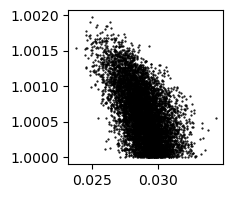

In [45]:
#Plots the portofolios mentioned above


plt.figure(figsize=(2,2))
plt.scatter(x=dfFirst['Total_risk'],y=dfFirst['Return'],s=0.3, color='black')
plt.show()

In [55]:
#Setting sorting requirements for the portofolios 


#INPUT FIELD
minimum_return = 1.001
maximum_risk = 0.03

In [56]:
#Activate the sorting requirements mentioned above


def first_sort():
    minret_crit = dfFirst.loc[dfFirst['Return'] >= minimum_return]
    maxvar_crit = dfFirst.loc[dfFirst['Total_risk'] <= maximum_risk]
    first_merge = minret_crit.merge(maxvar_crit, how='inner',
                                    on=['Return', 'Total_risk','Negative_risk','Sharpe_Ratio','Sortino_Ratio','Positive_risk','Pos_risk_ratio'])
    first_merge.rename(columns = {'Weigths_x':'Weigths'}, inplace=True)
    del first_merge['Weigths_y']
    return  first_merge
dfSecond = first_sort()

In [57]:
#Creating two new ratios based on  the portofolios that still remains


def new_ratios():
    calmar_list = []
    rsquared_list = []
    for j in range(0,len(dfSecond),1):

        selective_list = np.array(np.linspace(0,0,len(mystocks[0][1])))
        
        for i in range(0,len(mystocks),1):
            portofolio_movement = np.cumprod(np.array(dfSecond.Weigths[j][0][i])*mystocks[i][1]+1)
            selective_list = np.add(selective_list, portofolio_movement)

        selective_list = selective_list - len(mystocks) + 1
        calmars = (selective_list[-1:][0]-1)/(selective_list.min()/selective_list.max())
        calmar_list.append(calmars)
        df = pd.DataFrame()
        df['move'] = selective_list
        df['days'] = np.linspace(1,len(portofolio_movement),len(portofolio_movement))
        model = smf.ols(formula='move~days',data=df).fit()
        rsquared_list.append(model.rsquared)
    dfSecond['R_squared'] = rsquared_list
    dfSecond['Calmar_ratio'] = calmar_list
new_ratios()

<h3> D) Second time sorting </h3>

In [60]:
#Creating new sorting requirments


#INPUT FIELD
top_percentile_sharpe = 0.9
top_percentile_sortino = 0.9
top_percentile_pos_risk_ratio = 0.9
top_percentile_calmar = 0.9
top_percentile_rsq = 0.9

In [61]:
#Activating the requirments mentioned above


def likeable_weigths():

    topsha_crit = dfSecond.loc[dfSecond['Sharpe_Ratio'] >= dfSecond['Sharpe_Ratio'].quantile(q=top_percentile_sharpe)]
    topsor_crit = dfSecond.loc[dfSecond['Sortino_Ratio'] >= dfSecond['Sortino_Ratio'].quantile(q=top_percentile_sortino)]
    toppos_crit = dfSecond.loc[dfSecond['Pos_risk_ratio'] >= dfSecond['Pos_risk_ratio'].quantile(q=top_percentile_pos_risk_ratio)]
    topcal_crit = dfSecond.loc[dfSecond['Sortino_Ratio'] >= dfSecond['Sortino_Ratio'].quantile(q=top_percentile_calmar)]
    toprsq_crit = dfSecond.loc[dfSecond['Pos_risk_ratio'] >= dfSecond['Pos_risk_ratio'].quantile(q=top_percentile_rsq)]

    first_merge = topsha_crit.merge(topsor_crit, how='inner',
                                    on=['Return', 'Total_risk','Negative_risk','Sharpe_Ratio','Sortino_Ratio','Positive_risk','Pos_risk_ratio','Calmar_ratio','R_squared'])
    del first_merge['Weigths_x']

    second_merge = first_merge.merge(toppos_crit, how='inner',
                                    on=['Return', 'Total_risk','Negative_risk','Sharpe_Ratio','Sortino_Ratio','Positive_risk','Pos_risk_ratio','Calmar_ratio','R_squared'])
    del second_merge['Weigths_y']

    third_merge = second_merge.merge(topcal_crit, how='inner',
                                    on=['Return', 'Total_risk','Negative_risk','Sharpe_Ratio','Sortino_Ratio','Positive_risk','Pos_risk_ratio','Calmar_ratio','R_squared'])
    del third_merge['Weigths_x']

    fourth_merge = third_merge.merge(toprsq_crit, how='inner',
                                    on=['Return', 'Total_risk','Negative_risk','Sharpe_Ratio','Sortino_Ratio','Positive_risk','Pos_risk_ratio','Calmar_ratio','R_squared'])
    del fourth_merge['Weigths_y']

    return fourth_merge
dfThird = likeable_weigths()
dfThird.shape

(13, 10)

<h3> E) Third time sorting </h3>

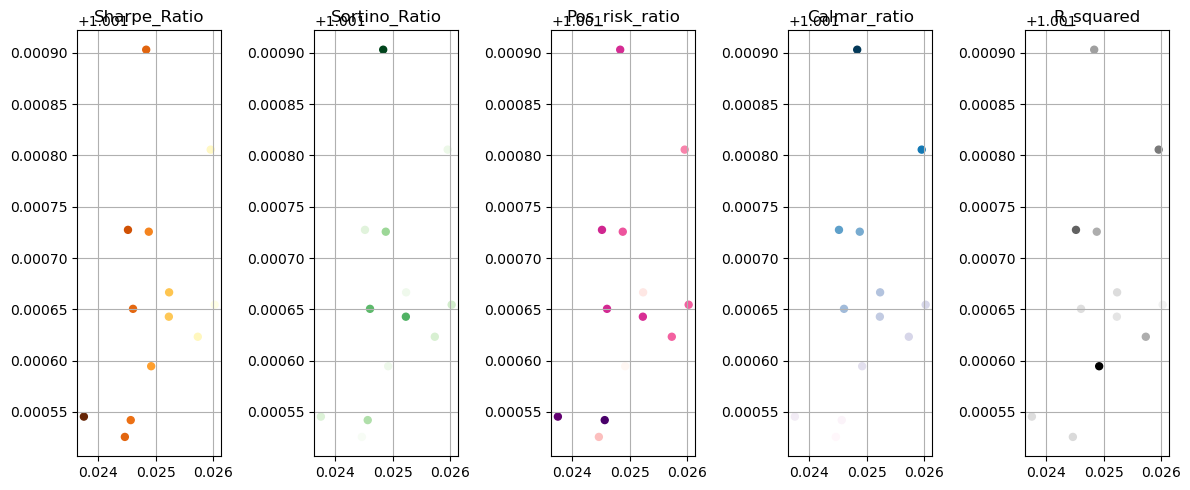

In [62]:
#Plotting the remaining portofolios and showing their values based on
#different key parameters. 
#Here I want to pick the portofolio with the brigthest color in 
#each plot


fig, ax = plt.subplots(1,5, figsize=(12,5))
colratios = ['Sharpe_Ratio','Sortino_Ratio','Pos_risk_ratio','Calmar_ratio','R_squared']
colcolors = ['YlOrBr','Greens','RdPu','PuBu','Greys']
for i in range(0,len(colratios),1):
    ax[i].scatter(x=dfThird['Total_risk'],y=dfThird['Return'], c=dfThird[colratios[i]], cmap=colcolors[i], s=25)
    ax[i].set_title(label=colratios[i])
    ax[i].grid()
fig.tight_layout()
plt.show()

In [68]:
#Make the final reuirments adjustment activating them


#INPUT FIELD START
final_min_ret = 1.0019
final_max_var = 0.025
final_min_var = 0.024
# var_type = 'Sharpe'
var_type = 'Sortino'
#INPUT FIELD END.

def choosen_portofolio():
    first_filtering = dfThird.loc[dfThird['Return'] >= final_min_ret]
    second_filtering = first_filtering.loc[first_filtering['Total_risk'] <= final_max_var]
    third_filtering = second_filtering.loc[second_filtering['Total_risk'] >= final_min_var]
    if var_type == 'Sortino':
        fourth_filtering = third_filtering.loc[third_filtering['Sortino_Ratio'] == third_filtering['Sortino_Ratio'].max()].reset_index()
    else:
        fourth_filtering = second_filtering.loc[third_filtering['Sharpe_Ratio'] == third_filtering['Sharpe_Ratio'].max()].reset_index()
    del fourth_filtering['index']
    return fourth_filtering
optimal_portofolio = choosen_portofolio()

<h3> F) Conclusion </h3>

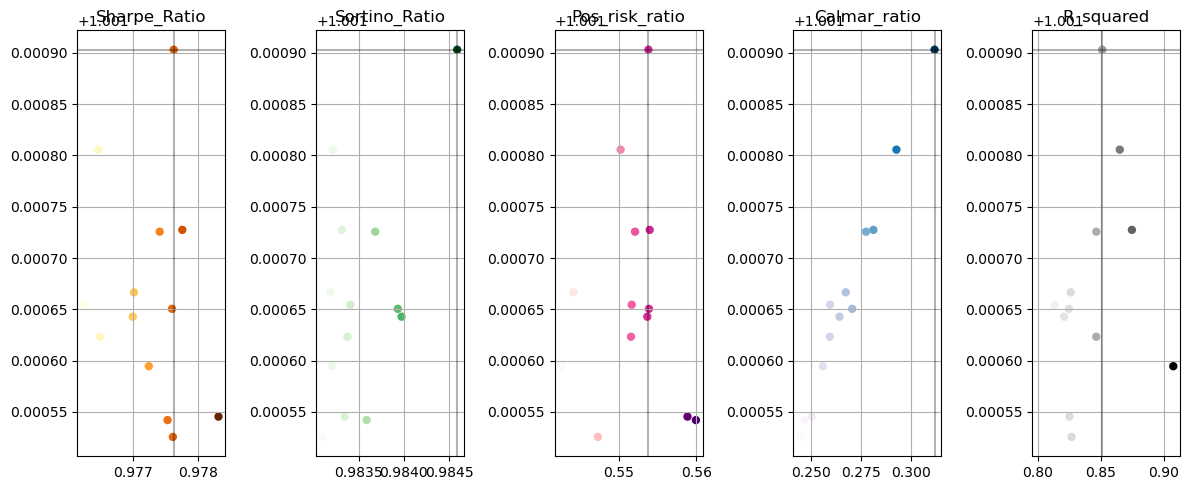

Weigth in AKRBP.OL should be 2 %
Weigth in ATEA.OL should be 31 %
Weigth in EQNR.OL should be 1 %
Weigth in EPR.OL should be 40 %
Weigth in LSG.OL should be 1 %
Weigth in MOWI.OL should be 9 %
Weigth in NSKOG.OL should be 0 %
Weigth in SRBNK.OL should be 14 %
Weigth in SUBC.OL should be 2 %

The return will be: 1.0019 %.
The risk will be: 2.48 %.


,Return,Total_risk,Negative_risk,Positive_risk,Pos_risk_ratio,Sharpe_Ratio,Sortino_Ratio,R_squared,Calmar_ratio,Weigths
0,1.001903,0.024833,0.017584,0.017199,0.553831,0.977626,0.98459,0.851298,0.312085,"[[0.017957536100914284, 0.3122381048253532, 0...."


In [70]:
#Getting the specific of the choosen portofolio


fig, ax = plt.subplots(1,5, figsize=(12,5))
colratios = ['Sharpe_Ratio','Sortino_Ratio','Pos_risk_ratio','Calmar_ratio','R_squared']
colcolors = ['YlOrBr','Greens','RdPu','PuBu','Greys']
for i in range(0,len(colratios),1):
    ax[i].scatter(x=dfThird[colratios[i]],y=dfThird['Return'], c=dfThird[colratios[i]], cmap=colcolors[i], s=25)
    ax[i].axvline(x=optimal_portofolio[colratios[i]][0], color='black',alpha=.3)
    ax[i].axhline(y=optimal_portofolio['Return'][0], color='black',alpha=.3)
    ax[i].set_title(label=colratios[i])
    ax[i].grid()
fig.tight_layout()
plt.show()

for i in range(0,len(stocks),1):
    weigth = round(optimal_portofolio['Weigths'][0][0][i]*100)
    print('Weigth in',stocks[i],'should be', weigth,'%'),      
print('\nThe return will be:', round((optimal_portofolio['Return'][0]),4),'%.')
print('The risk will be:', round(((optimal_portofolio['Total_risk'][0])*100),2),'%.' )

optimal_portofolio

<h3> G) Random walk </h3>

In [71]:
#Creating a random walk of the portofolio, the walks include:
#specific downside- and upside risk of the portofolio,
#and the ratio of predicted positive movements of the portofolio


def random_walk_df():
    ra_wa_df = pd.DataFrame()
    for i in range(0,int(portofolio_Distributions/20),1):
        pos = []
        while len(pos) < int(hold_portofolio_days*optimal_portofolio['Pos_risk_ratio'][0]):
            sel_pos = np.random.normal(optimal_portofolio['Return'][0],optimal_portofolio['Positive_risk'][0],1) 
            if sel_pos >= optimal_portofolio['Return'][0]:
                pos.append(sel_pos[0])

        neg = []
        while len(neg) < (hold_portofolio_days-int(hold_portofolio_days*optimal_portofolio['Pos_risk_ratio'][0])):
            sel_neg = np.random.normal(optimal_portofolio['Return'][0],optimal_portofolio['Negative_risk'][0],1)
            if sel_neg < optimal_portofolio['Return'][0]:
                neg.append(sel_neg[0])
        
        sel_walk = pos + neg
        sel_walk = np.random.choice(sel_walk, len(sel_walk))
        ra_wa_df[str(i)] = np.cumprod(sel_walk)
    
    avg_cum = []
    for i in range(0,hold_portofolio_days,1):
        avg_sel = 0 
        for j in range(0,int(portofolio_Distributions/20),1):
            avg_sel += ra_wa_df[str(j)][i]
        avg_cum.append(avg_sel/portofolio_Distributions*20)
    ra_wa_df['Average'] = (avg_cum)

    return ra_wa_df


random_walk_df = random_walk_df()

In [73]:
#Creating the standard deviation interval of 
#the average random  walk of the portofolio


alfa = int(portofolio_Distributions/20)

lower_list = []
upper_list = []

for i in range(0,hold_portofolio_days,1):
    first_sorted_list = []
    for j in range(0,alfa,1):
        first_sorted_list.append(random_walk_df[str(j)][i])
    first_sorted_list = pd.Series(first_sorted_list).sort_values().reset_index()
    del first_sorted_list['index']
    selective_average = random_walk_df['Average'][i]
    def closest(lst, K):
        return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
    selective_close = closest(first_sorted_list[int()],selective_average)
    echo = first_sorted_list.loc[first_sorted_list[int(0)] == selective_close].index.values
    lower = first_sorted_list[0][(echo[0] - int(alfa*0.33))]
    lower_list.append(lower)

    hotel = (echo[0] + int(alfa*0.33))
    if hotel >= alfa:
        upper = first_sorted_list[0][alfa-1]
    else:
        upper = first_sorted_list[0][(echo[0] + int(alfa*0.33))]
    upper_list.append(upper)
random_walk_df['Upper'] = upper_list
random_walk_df['Lower'] = lower_list

In [74]:
#Creating how the portofolio have moved previously.


def the_portofolio():
    selective_list = np.array(np.linspace(0,0,len(mystocks[0][1])))
    for i in range(0,len(mystocks),1):
        portofolio_movement = np.cumprod(np.array(np.array(dfThird.Weigths[0][0][i])*mystocks[i][1]+1))
        selective_list = np.add(selective_list, portofolio_movement)
    selective_list = selective_list - len(mystocks)
    return selective_list+1 
portofolio_movement = the_portofolio()

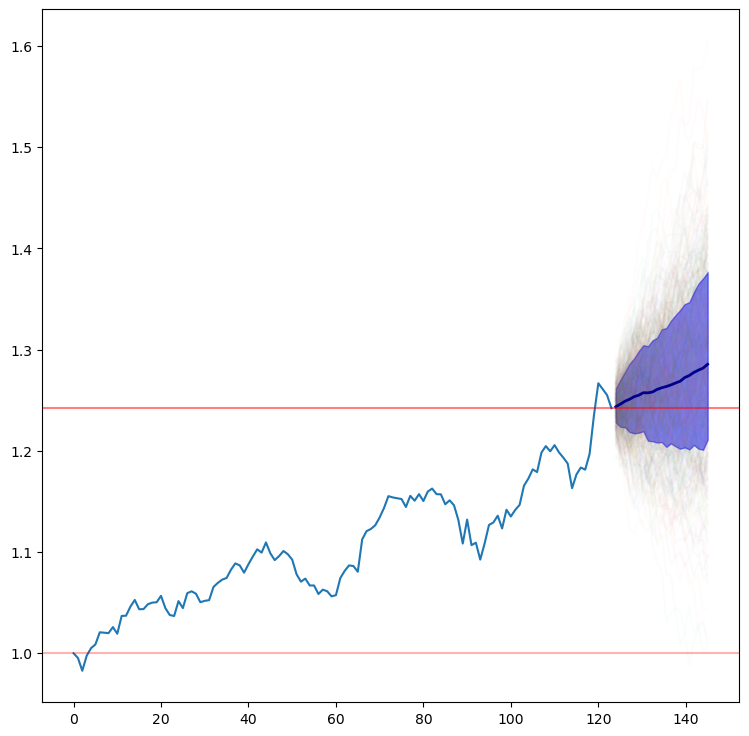

Expected return over a 21 days period is 4.338 %


In [75]:
#Plotting all graphs with assosciation to the
#random walk. 


fig, ax = plt.subplots(figsize=(9,9))
for i in range(0,len(random_walk_df.columns)-3,1):
    ax.plot(np.linspace(len(mystocks[0][1]),len(mystocks[0][1])+hold_portofolio_days,hold_portofolio_days),
    random_walk_df[str(i)]+portofolio_movement[-1:][0]-1, alpha=.02)
ax.plot(np.linspace(len(mystocks[0][1]),len(mystocks[0][1])+hold_portofolio_days,hold_portofolio_days),
        random_walk_df['Average']+portofolio_movement[-1:][0]-1, linewidth=2, color='darkblue')

ax.fill_between(np.linspace(len(mystocks[0][1]),len(mystocks[0][1])+hold_portofolio_days,hold_portofolio_days),
                random_walk_df['Lower']+portofolio_movement[-1:][0]-1,
                random_walk_df['Upper']+portofolio_movement[-1:][0]-1,
                color='blue', alpha=.5)
ax.plot(pd.Series(portofolio_movement))
plt.axhline(y=1, color='r', alpha=.3)
plt.axhline(y=portofolio_movement[-1:][0], color='r', alpha=.5)
plt.show()

print('Expected return over a', hold_portofolio_days, 'days period is', round((random_walk_df['Average'][hold_portofolio_days-1]-1)*100,3),'%')